# Case Study
<p>Buat program python dengan VSM secara berkelompok. Buat sebuah korpus terlebih dahulu. Korpus boleh dari twitter, news, ataupun yang lain.

<p>Buat laporan hasil program dengan menentukan 5 kueri.

Dipresentasikan di pertemuan 11

 Korpus dari twitter tentang :
 * Data Science
 * Text mining
 * Text Retrieval



* NLTK library for :
> Stemming English use Algo Porter <br>
> Stopwords english



In [130]:
import pandas as pd

# Get data

In [131]:
df_nlp_text=pd.read_csv("/content/dataset_twitter-scraper-task_.csv")
df_text_mining=pd.read_csv("/content/dataset_twitter-scraper-task_textmining.csv")

# Cleaning data

Concat dua data
* `df_nlp_text` atau data tentang nlp campuran dari text mining, text retrieval, bahkan data science didalamnya pada saat mengambil text. <br>
* gabungkan dengan `df_text_mining` yang didalam text hanya tentang text mining pada saat pengambilan korpus

In [132]:
df_nlp_text["full_text"]

0     I think the message in Data Science needs to b...
1     Python libraries for:\n\n— Machine Learning\n—...
2                     Free Data Science PDF Books  \n🧵:
3     Top tech skills for a #DataEngineer in 2022 🧑‍...
4     💡¿Se puede crear gráficos espectaculares que i...
                            ...                        
59    Excellent retrieval skills in #BusheyHeathRead...
60    A novel adapter-based method for parameter-eff...
61    On @jhuclsp YouTube: Changes in Tweet Geolocat...
62    Yes, I am looking for a summer 2023 research i...
63    trec: TREC collection (2010). A bipartite netw...
Name: full_text, Length: 64, dtype: object

In [133]:
df_text_mining["full_text"]

0     Every story in the world has one of 6 basic pl...
1     SoLA invites you to a lecture on “Text Mining ...
2     Check out our events happening this week! \n\n...
3     The RuMOR team is growing! Thanks to @SSHRC_CR...
4     I'm doing a lot of preaching right now to coll...
5     Why my #Geosis package is simply the most robu...
6     Text Mining and Analytics #TextMining https://...
7     Let's speed up my booming Twitter career! Here...
8     Are you after a course that will teach you the...
9     Fundamentals of Predictive Text Mining (Texts ...
10    Awesome strategies for our humanities courses ...
11                         meaning of life is number 42
12    Brisbane Data, Power BI and AI Bootcamp speake...
13                             this is a possible tweet
14                                        It's a Tweet!
15                             this is an example tweet
16                              this is your next tweet
17                         or, maybe, a possible

## Gabungkan data terlebih dahulu

In [134]:
df_1=df_nlp_text["full_text"]
df_2=df_text_mining["full_text"]

In [135]:
df_=pd.concat([df_1, df_2], ignore_index=True)

In [136]:
df_=pd.DataFrame({
    "full_text":df_
}) # Simpan data yang sudah yang dsimpan kedalam dataframe

In [137]:
df_["full_text"][4]

'💡¿Se puede crear gráficos espectaculares que incluyan los resultados de las pruebas estadísticas con rigor? \n\n😜Spoiler: 📦ggstatsplot lo vuelve simple y listo para publicar\n\n🔗 https://t.co/EgUDtvvcgF\n🔗 https://t.co/236e4dP9XN\n🔗 https://t.co/hntRdPY1Ts \n\n#RStats #DataScience https://t.co/kzeK8myHk5'

dapat dilihat bahwa ada bahasa selain bahasa inggris, yaitu bahasa spanyol, lalu apa yang dapat dilakukan ?
<br>
* tahap preprocessing dijadikan bahasa inggris pada saat menggunakan [`deep-tranlator`](https://deep-translator.readthedocs.io/en/latest/usage.html)

In [138]:
! pip install deep-translator # intall deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
# Percobaan kata bahasa non inggris menjadi bahasa inggris
from deep_translator import GoogleTranslator
word = 'Se puede crear gráficos espectaculares que incluyan los resultados de las pruebas estadísticas con rigor lo vuelve simple y listo para publicar'
translated = GoogleTranslator(source='auto', target='en').translate(text=word)

In [140]:
translated

'Spectacular graphs can be created that include the results of statistical tests with rigor makes it simple and ready to publish'

In [141]:
df_["full_text"][4]=GoogleTranslator(source='auto', target='en').translate(text=df_["full_text"][4])

In [142]:
df_["full_text"][4]

'💡Can you create spectacular graphics that include the results of rigorous statistical tests?\n\n😜Spoiler: 📦ggstatsplot makes it simple and ready to post\n\n🔗 https://t.co/EgUDtvvcgF\n🔗 https://t.co/236e4dP9XN\n🔗 https://t.co/hntRdPY1Ts\n\n#RStats #DataScience https://t.co/kzeK8myHk5'

In [143]:
df_.head()

,full_text
0,I think the message in Data Science needs to b...
1,Python libraries for:\n\n— Machine Learning\n—...
2,Free Data Science PDF Books \n🧵:
3,Top tech skills for a #DataEngineer in 2022 🧑‍...
4,💡Can you create spectacular graphics that incl...


In [144]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  84 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes


Dapat dilihat bahwa value di kolom `full_text` yang sebelumnya bahasa non inggris menjadi bahasa inggris

# Exploration text data

## Melihat berapa stopwords di data text

In [145]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
stop_en=stopwords.words('english')

In [147]:
import matplotlib.pyplot as plt
#code from https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb
def plot_top_stopwords_barchart(text):
    stop=stop_en
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    dict_stp={
        "Stop words":x,
        "Frequensi kemunculan":y
           }
    print(dict_stp)
    plt.figure(figsize=(15,10))
    plt.bar(x,y)
    plt.title("10 Stopwords yang sering muncul ")
    plt.savefig("Plot Stopwords.png")

{'Stop words': ('to', 'in', 'and', 'a', 'the', 'of', 'is', 'for', 'you', 'on'), 'Frequensi kemunculan': (53, 46, 46, 44, 38, 33, 26, 24, 19, 18)}


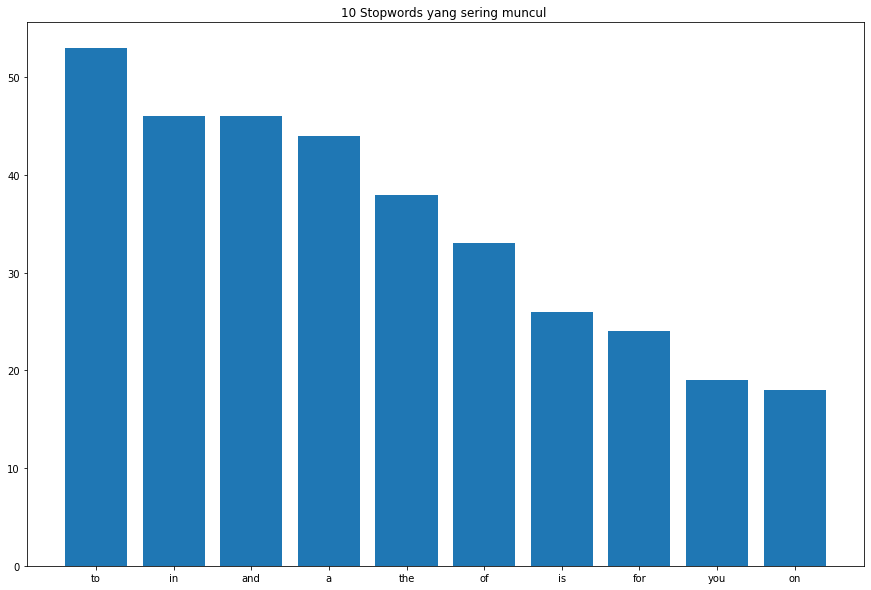

In [148]:
plot_top_stopwords_barchart(df_["full_text"])

In [149]:
korpus_kata=["Data","text","data","mining","retrieval","Science","science"]
import matplotlib.pyplot as plt
#code from https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb
def plot_words_barchart(text):
    stop=korpus_kata
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.figure(figsize=(15,5))
    plt.bar(x,y)
    plt.title("Kata yang sering muncul ")
    
    plt.savefig("Plot kata.png")

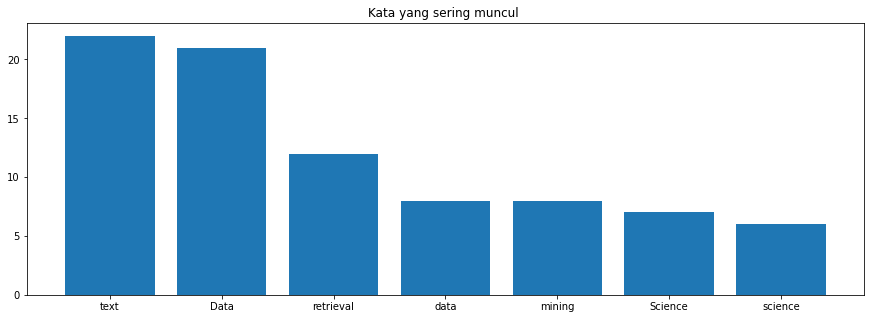

In [150]:
plot_words_barchart(df_["full_text"])

# Preprocessing text
> Remove Stopwords

> Stemming

> Case folding

## Casefolding

In [151]:
import re

In [152]:
def caseFolding(text):
  text=text.lower()
  text=re.sub(r"[^a-zA-Z]"," ",text) # Menghapus tanda baca dan angka
  text=re.sub(r"https?://\S|www\.\S|t.co?\S"," ",text) # Menghapus url
  text=re.sub("#\S*\s", "", text)
  text=re.sub("W+", "", text)
  text=re.sub("@\S*\s", "", text)
  text=re.sub("http\S*\s", "", text)
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)  
  '''
   Logic nya adalah 
   jika terdapat kata https maka hapus 
   jika https?: maka jika ada kata atau text sesudah https maka dihapus 
   jika S+ maka 
  '''
  
  return text

In [153]:
raw_text=df_["full_text"][1]
print("Data mentah :",raw_text)
print(f'\nData Case folding : {caseFolding(raw_text)}')

Data mentah : Python libraries for:

— Machine Learning
— Data Science
— Web Development
— Game Development
— Automation Testing https://t.co/hYcOV8NfGC

Data Case folding : python libraries for     machine learning   data science   web development   game development   automation testing     hycov nfgc


In [154]:
caseFolding(raw_text)

'python libraries for     machine learning   data science   web development   game development   automation testing     hycov nfgc'

## Remove stopwords

In [155]:
stop_en=stopwords.words('english')

In [156]:
more_stopwords=["hycov" ,"nfgc","wwuzcsd","aai","pykaxmmyk","xr","p"]

In [157]:
def flatten(l):
    """
    Same as 
    flat_list = []
    for sublist in l:
    for item in sublist:
        flat_list.append(item)

    Example =[[1,2,3,4,5]] - > [1,2,3,4,5]
    """
    return " ".join([item for sublist in l for item in sublist])
    
def remove_stop_words(text):
  stp=stop_en+more_stopwords
  clean_words = []
  text=text.split()
  perulangan_text=[word for word in text if word not in stp]
  clean_words.append(perulangan_text)
  return flatten(clean_words)

In [158]:
print(f'Stopwords remove: {remove_stop_words(caseFolding(raw_text))}')

Stopwords remove: python libraries machine learning data science web development game development automation testing


## Stemming

In [159]:
from nltk.stem.porter import PorterStemmer # Stemming untuk teks bahasa inggris

In [160]:
stem_en=PorterStemmer()

In [161]:
def stemsWords(text):
  text=stem_en.stem(text)
  return text

In [162]:
stemsWords(remove_stop_words(caseFolding(raw_text)))

'python libraries machine learning data science web development game development automation test'

## Word normalization

In [163]:
# Buat korpus bank 
korpus_word_normal={
    "kata":["machin","min","mine"],
    "perbaikan":["machine","mining","mining"]
}
key_norm=pd.DataFrame(korpus_word_normal)

In [164]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['kata'] == word]['perbaikan'].values[0] if (key_norm['kata'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Text preprocessing pipeline

In [165]:
def text_preprocessing_process(text):
  text = caseFolding(text)
  text = remove_stop_words(text)
  text = stemsWords(text)
  text = text_normalize(text)
  return text

In [166]:
df_["clean_text"]=df_["full_text"].apply(text_preprocessing_process)

In [167]:
df_.head()

,full_text,clean_text
0,I think the message in Data Science needs to b...,think message data science needs believe every...
1,Python libraries for:\n\n— Machine Learning\n—...,python libraries machine learning data science...
2,Free Data Science PDF Books \n🧵:,free data science pdf book
3,Top tech skills for a #DataEngineer in 2022 🧑‍...,top skills dataengineer artificialintelligence...
4,💡Can you create spectacular graphics that incl...,create spec lar graphics include results rigor...


In [168]:
df_["full_text"][0]

"I think the message in Data Science needs to be: Don't believe everything you read. 🧵\n\n#stats #datascience https://t.co/4jGMgmX8Nw"

In [169]:
df_["clean_text"][0]

'think message data science needs believe everything read stats datascience jgmgmx nw'

# Buat VSM
> Lakukan Countvectorizer <br>
 Melihat banyak kata yang muncul dalam setiap dokumen <br>

> Lakukan TfIdf

## Lakukan Countvectorizer

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [171]:
korpus=df_["clean_text"]
korpus

0     think message data science needs believe every...
1     python libraries machine learning data science...
2                            free data science pdf book
3     top skills dataengineer artificialintelligence...
4     create spec lar graphics include results rigor...
                            ...                        
79                                        example tweet
80                                           next tweet
81                                  maybe possible badg
82    python text mining perform text processing wor...
83                          something completely differ
Name: clean_text, Length: 84, dtype: object

In [ ]:
X = vectorizer.fit_transform(korpus)

In [ ]:
korpus_unigram=X.toarray()
data_unigram_vectorizer = pd.DataFrame(korpus_unigram, columns=vectorizer.get_feature_names_out())
data_unigram_vectorizer

,abaonline,accepted,ad,adaptation,adapter,admissions,advisors,agains,ahlvxdsuja,ahmed,...,year,yes,youtube,yzhoha,zbge,zbhat,zero,zfwympqep,zhai,zli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
matrces_indices_tf = pd.DataFrame(korpus_unigram.T,
                              index=vectorizer.get_feature_names_out(),
                            columns=[f'D{i+1}' for i in range(len(df_["clean_text"]))])
matrces_indices_tf.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84
abaonline,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accepted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adaptation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adapter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_countVector=matrces_indices_tf.stack().reset_index()

In [ ]:
data_countVector

,level_0,level_1,0
0,abaonline,D1,0
1,abaonline,D2,0
2,abaonline,D3,0
3,abaonline,D4,0
4,abaonline,D5,0
...,...,...,...
60223,zli,D80,0
60224,zli,D81,0
60225,zli,D82,0
60226,zli,D83,0


In [ ]:
data_countVector=data_countVector.rename(columns={0:'tf', 'level_0': 'term','level_1': 'Dokument'})
data_countVector[data_countVector["term"]=="data"]

,term,Dokument,tf
11256,data,D1,1
11257,data,D2,1
11258,data,D3,1
11259,data,D4,0
11260,data,D5,0
...,...,...,...
11335,data,D80,0
11336,data,D81,0
11337,data,D82,0
11338,data,D83,0


In [ ]:
cek=data_countVector[data_countVector["term"]=="text"]
cek=cek[cek["tf"]!=0]
len(cek)

44

## Lakukan TFIDF

### Menggunakan hard coded(scrath)

In [ ]:
import numpy as np

In [ ]:
n_words=len(df_["clean_text"].index) # lakukan deklarasi untuk variabel banyak dokumen
n_words

84

In [ ]:
term=data_countVector["term"]
tfidf_en={}
term_non_zero=[]
hasil_tfidf_=[]
hasil_term_=[]

hasil_tf_=[]

hasil_dok=[]



korpus_search=input("Masukkan input:")
korpus_search=text_preprocessing_process(korpus_search)
for query in korpus_search.split():
  cek_query=data_countVector["term"]==query

  hasil_qu=data_countVector[cek_query]
  dict_hasil=hasil_qu[hasil_qu["tf"]!=0]
  hasil_term=dict_hasil["term"]
  hasil_tf=dict_hasil["tf"]

  print("\nTERM",query)
  print("DF",len(hasil_tf))
  print("N",n_words)
  print("N/df",n_words/len(hasil_tf))
  n_df=n_words/len(hasil_tf)
  idf=np.log10(n_df)
  for tf in  hasil_tf:
    
    data_frame_TFIDF={
                  "term":query,
                  "freq":tf,
                  "TFIDF":idf*tf
              }
    print(data_frame_TFIDF)
    
    


Masukkan input:data text python retrieval mining

TERM data
DF 23
N 84
N/df 3.652173913043478
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 2, 'TFIDF': 1.1251029000885775}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 2, 'TFIDF': 1.1251029000885775}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 3, 'TFIDF': 1.6876543501328662}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 1, 'TFIDF': 0.5625514500442887}
{'term': 'data', 'freq': 2, 'TFIDF': 1.1251029000885775}
{'term': 'data', 'freq': 1, 'TFIDF': 0.562551450044

## Lakukan Pencarian kuery
> TFIDF

In [ ]:
term=data_countVector["term"]

korpus_search=input("Masukkan input:")
korpus_search=text_preprocessing_process(korpus_search)
for query in korpus_search.split():
  if (query==term).any():  # Buat kondisi kata yang di input harus sesusai kata yang ada di term
    cek_query=data_countVector["term"]==query
    hasil_query=data_countVector[cek_query]
    dict_hasil=hasil_query[hasil_query["tf"]!=0]
    hasil_term=dict_hasil["term"]
    hasil_tf=dict_hasil["tf"]
    print("\nTERM",query)
    print("DF",len(hasil_tf))
    print("N",n_words)
    print("N/df",n_words/len(hasil_tf))
    n_df=n_words/len(hasil_tf)
    print("IDF",np.log10(n_df))
   
    hasil_tfq=hasil_query[hasil_query["tf"]==0]
    if 0 in hasil_tfq:
        tfidfQ=1
        print(hasil_tf)
        print("\nTERM: ",query)
        print("N",n_words)
        tfidf=np.log10(n_df)
        data_frame_TFIDF={
                            "term":query,
                            "freq": tfidfQ,
                            "TFIDF":tfidf *tfidfQ
                        }
        print(data_frame_TFIDF)
  else:
    del query

Masukkan input:data text python retrieval mining

TERM data
DF 23
N 84
N/df 3.652173913043478
IDF 0.5625514500442887

TERM text
DF 44
N 84
N/df 1.9090909090909092
IDF 0.2808266095756942

TERM python
DF 11
N 84
N/df 7.636363636363637
IDF 0.8828866009036567

TERM retrieval
DF 18
N 84
N/df 4.666666666666667
IDF 0.6690067809585756

TERM mining
DF 27
N 84
N/df 3.111111111111111
IDF 0.49291552190289434


## Buat vsm

> Jumlah total masing-masing dokument tfidf

> jumlah total query $^2$

> Jumlah total masing-masing dokument tfidf $^2$ lalu $\sqrt{k}$

In [172]:
# Buat ID
id={
  "id":[id for id in range(1,85)]
}
nomor_id=pd.DataFrame(id)
df_=pd.concat([nomor_id,korpus],axis=1)
df_.head()

,id,clean_text
0,1,think message data science needs believe every...
1,2,python libraries machine learning data science...
2,3,free data science pdf book
3,4,top skills dataengineer artificialintelligence...
4,5,create spec lar graphics include results rigor...


In [173]:
class Appearance:
    """
    Represents the appearance of a term in a given document, along with the
    frequency of appearances in the same one.
    """
    def __init__(self, docId,frequency):
        self.docId = docId
        self.frequency = frequency
        
    def __repr__(self):
        """
        String representation of the Appearance object
        """
        return str(self.__dict__)

def inverted_index(index, document):
      # Dictionary with each term and the frequency it appears in the text.
        text_search=document["clean_text"]
        terms=text_search.split(' ')
        appearances_dict={}
        for term in terms:
            term_frequency = appearances_dict[term].frequency if term in appearances_dict else 0
            # Jika term atau kata yang muncul dan belum muncul atau 0 maka di set 1 
            appearances_dict[term] = Appearance(document["id"], term_frequency + 1)
            # Jika term yang sudah muncul atau disimpan 1 maka akan bertambah 
        # Update the inverted index
        update_dict = { key: [appearance]    
                       if key not in index
                       else index[key] + [appearance]
                       for (key, appearance) in appearances_dict.items() }
        index.update(update_dict)
        # Add the document into the database
       
        return index

In [174]:
indexEng={}
for row in df_.to_dict("records"):
  inverted_index(indexEng,row)

In [175]:
indexEng

{'think': [{'docId': 1, 'frequency': 1}],
 'message': [{'docId': 1, 'frequency': 1}],
 'data': [{'docId': 1, 'frequency': 1},
  {'docId': 2, 'frequency': 1},
  {'docId': 3, 'frequency': 1},
  {'docId': 6, 'frequency': 1},
  {'docId': 7, 'frequency': 2},
  {'docId': 8, 'frequency': 1},
  {'docId': 10, 'frequency': 2},
  {'docId': 11, 'frequency': 1},
  {'docId': 12, 'frequency': 3},
  {'docId': 14, 'frequency': 1},
  {'docId': 15, 'frequency': 1},
  {'docId': 16, 'frequency': 1},
  {'docId': 17, 'frequency': 1},
  {'docId': 18, 'frequency': 1},
  {'docId': 19, 'frequency': 2},
  {'docId': 20, 'frequency': 1},
  {'docId': 26, 'frequency': 1},
  {'docId': 30, 'frequency': 3},
  {'docId': 34, 'frequency': 2},
  {'docId': 46, 'frequency': 3},
  {'docId': 69, 'frequency': 1},
  {'docId': 73, 'frequency': 3},
  {'docId': 77, 'frequency': 2}],
 'science': [{'docId': 1, 'frequency': 1},
  {'docId': 2, 'frequency': 1},
  {'docId': 3, 'frequency': 1},
  {'docId': 6, 'frequency': 1},
  {'docId': 7

In [176]:
tfidfEng = indexEng.copy()

In [177]:
jumlahdok = len(df_.index) #hitung jumlah dokumen
jumlahdok

84

In [178]:
panjangVektorDok = [0]*jumlahdok
listidfEng = []

#looping term yang ada di inverted index indexEng
for key in indexEng:
  dfEng = len(indexEng[key])
  idfEng = np.log10(jumlahdok/dfEng)
  listidfEng.append(idfEng)
  i = 0
  for value in indexEng[key]:
    tfidfEng[key][i].frequency = value.frequency*idfEng
    panjangVektorDok[value.docId-1] = panjangVektorDok[value.docId-1] + (tfidfEng[key][i].frequency*tfidfEng[key][i].frequency)
    i+=1

In [179]:
tfidfEng

{'think': [{'docId': 1, 'frequency': 1.9242792860618816}],
 'message': [{'docId': 1, 'frequency': 1.9242792860618816}],
 'data': [{'docId': 1, 'frequency': 0.5625514500442887},
  {'docId': 2, 'frequency': 0.5625514500442887},
  {'docId': 3, 'frequency': 0.5625514500442887},
  {'docId': 6, 'frequency': 0.5625514500442887},
  {'docId': 7, 'frequency': 1.1251029000885775},
  {'docId': 8, 'frequency': 0.5625514500442887},
  {'docId': 10, 'frequency': 1.1251029000885775},
  {'docId': 11, 'frequency': 0.5625514500442887},
  {'docId': 12, 'frequency': 1.6876543501328662},
  {'docId': 14, 'frequency': 0.5625514500442887},
  {'docId': 15, 'frequency': 0.5625514500442887},
  {'docId': 16, 'frequency': 0.5625514500442887},
  {'docId': 17, 'frequency': 0.5625514500442887},
  {'docId': 18, 'frequency': 0.5625514500442887},
  {'docId': 19, 'frequency': 1.1251029000885775},
  {'docId': 20, 'frequency': 0.5625514500442887},
  {'docId': 26, 'frequency': 0.5625514500442887},
  {'docId': 30, 'frequency':

In [180]:
search_term = input("inputkueri") #atau manggil dari yang kueri sebelumnya
cleanKueri = text_preprocessing_process(search_term)
listKueri = cleanKueri.split()
unique = set(listKueri)
dictKueri = dict.fromkeys(unique, 0)
for k in listKueri:
  if k in dictKueri.keys():
    dictKueri[k] = dictKueri.get(k)+1

inputkueridata text python 


In [181]:
dictKueri

{'text': 1, 'data': 1, 'python': 1}

In [226]:
tfidfQ = dictKueri.copy()
panjangVektorKueri = 0

for k in dictKueri:
  d = [x for x in indexEng if k in x] != []
  if d == True :
    tfidfQ[k] = dictKueri.get(k)*listidfEng[list(tfidfEng.keys()).index(k)]
    panjangVektorKueri = panjangVektorKueri + (tfidfQ[k]*tfidfQ[k])
  else:
      del tfidfQ[k]
tfidfQ

{'text': 0.2808266095756942,
 'data': 0.5625514500442887,
 'python': 0.8828866009036567}

In [183]:
cossim = []
dok=[]

for i in range(jumlahdok):
  pembilang = 0
  for k in tfidfQ:
    for v in tfidfEng[k]:
      if v.docId == (i+1):
        pembilang = pembilang + tfidfQ.get(k)*v.frequency #hitung rumus pembilang
  score = pembilang/np.sqrt(panjangVektorKueri*panjangVektorDok[i])
  dok.append( (i+1))
  cossim.append(score)
  # print('skor smiliarity kueri dngan d-', (i+1),':',score)
sort_hasil={
      "dok":dok,
      "Score":cossim
}

df=pd.DataFrame(sort_hasil)

In [184]:
df.sort_values("Score",ascending=False)

,dok,Score
6,7,0.259777
19,20,0.231655
7,8,0.211466
1,2,0.167819
14,15,0.157328
...,...,...
32,33,0.000000
20,21,0.000000
12,13,0.000000
4,5,0.000000


## Membuat LSI

In [185]:
index=indexEng.copy()

In [186]:
index

{'think': [{'docId': 1, 'frequency': 1.9242792860618816}],
 'message': [{'docId': 1, 'frequency': 1.9242792860618816}],
 'data': [{'docId': 1, 'frequency': 0.5625514500442887},
  {'docId': 2, 'frequency': 0.5625514500442887},
  {'docId': 3, 'frequency': 0.5625514500442887},
  {'docId': 6, 'frequency': 0.5625514500442887},
  {'docId': 7, 'frequency': 1.1251029000885775},
  {'docId': 8, 'frequency': 0.5625514500442887},
  {'docId': 10, 'frequency': 1.1251029000885775},
  {'docId': 11, 'frequency': 0.5625514500442887},
  {'docId': 12, 'frequency': 1.6876543501328662},
  {'docId': 14, 'frequency': 0.5625514500442887},
  {'docId': 15, 'frequency': 0.5625514500442887},
  {'docId': 16, 'frequency': 0.5625514500442887},
  {'docId': 17, 'frequency': 0.5625514500442887},
  {'docId': 18, 'frequency': 0.5625514500442887},
  {'docId': 19, 'frequency': 1.1251029000885775},
  {'docId': 20, 'frequency': 0.5625514500442887},
  {'docId': 26, 'frequency': 0.5625514500442887},
  {'docId': 30, 'frequency':

In [187]:
import numpy as np

In [211]:
term_list=[]
bobot_=[]
idf=[]
for term in index:
  term_list.append(term)
  tfidf=[0]*jumlahdok
  
  df=len(index[term])
  
  idf.append(np.log10(jumlahdok/df))
  for v in index[term]:
    tfidf[v.docId-1]=v.frequency*(idf[term_list.index(term)])
  bobot_.append(tfidf)  

In [212]:
bobot_

[[3.702850770766825,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [3.702850770766825,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.3164641339469319,
  0.3164641339469319,
  0.3164641339469319,
  0,
  0,
  0.3164641339469319,
  0.6329282678938638,
  0.31

In [190]:
len(bobot_)

0

In [192]:
tfidf_cal = tfidfEng.copy() # Copy tfidf 
bobot=[] # deklarasi list bobot
for term_2 in tfidf_cal: # lakukan perulangan untuk copy dict tfidf 
  tfidf=[0]*jumlahdok # deklarasi list tfidf
  for v in tfidf_cal[term_2]: # lakukan perulangan untuk copy dict tfidf didalam term_2 
    tfidf[v.docId-1]=v.frequency #lakukan inisialisasi untuk menghapus value docId akan tetapi hanya menampilkan freqkuensi
  bobot.append(tfidf)  # simpan kedalam list bobot

In [193]:
len(bobot)

731

In [194]:
bobot

[[1.9242792860618816,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1.9242792860618816,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.5625514500442887,
  0.5625514500442887,
  0.5625514500442887,
  0,
  0,
  0.5625514500442887,
  1.1251029000885775,
  0.

In [195]:
arr={}
# def dict_2_array(dictnya):
#   arr_dict=dictnya.values()
#   array=[]
#   for arr in  arr_dict:
#     array.append([arr])
#   return array

def matrix_bobot(weight):
  bobot=np.array(weight)
  u,s,vh=np.linalg.svd(bobot,full_matrices=True)
  hasil_dict={
      "u":u,
      "vh":vh,
      "s":s,
      "u":u
  }
  for i in hasil_dict:
    arr[i]=hasil_dict.get(i)
  return arr  

In [196]:
array=matrix_bobot(bobot)

In [197]:
array

{'u': array([[-1.42756709e-03, -2.57891493e-04,  1.15485762e-03, ...,
          1.13233625e-02,  1.13233625e-02,  1.13233625e-02],
        [-1.42756709e-03, -2.57891493e-04,  1.15485762e-03, ...,
          5.34127681e-03,  5.34127681e-03,  5.34127681e-03],
        [-1.88815371e-01, -3.97379105e-03,  1.05036046e-01, ...,
         -1.73819482e-04, -1.73819482e-04, -1.73819482e-04],
        ...,
        [-5.16099294e-04, -4.48859531e-03, -1.06414866e-03, ...,
          9.60593331e-01, -3.94066690e-02, -3.94066690e-02],
        [-5.16099294e-04, -4.48859531e-03, -1.06414866e-03, ...,
         -3.94066690e-02,  9.60593331e-01, -3.94066690e-02],
        [-5.16099294e-04, -4.48859531e-03, -1.06414866e-03, ...,
         -3.94066690e-02, -3.94066690e-02,  9.60593331e-01]]),
 'vh': array([[-1.15567064e-02, -1.83868109e-02, -2.32098056e-02, ...,
         -4.11948041e-07, -1.83431669e-02, -1.90886751e-04],
        [-1.84207942e-03, -1.87791834e-03,  7.27859181e-04, ...,
         -3.57745662e-06, -

In [198]:
u=array.get("u")
s=array.get("s")
vh=array.get("vh")
u=array.get("u")
  
sinv=np.linalg.inv(np.diag(s))
sinv2=sinv[0:2,0:2]
vh2=vh[0:2,:]
u2=u[:,0:2]

In [199]:
u2

array([[-0.00142757, -0.00025789],
       [-0.00142757, -0.00025789],
       [-0.18881537, -0.00397379],
       ...,
       [-0.0005161 , -0.0044886 ],
       [-0.0005161 , -0.0044886 ],
       [-0.0005161 , -0.0044886 ]])

In [200]:
s

array([1.55777832e+01, 1.37448321e+01, 1.35701009e+01, 1.32476670e+01,
       1.22886105e+01, 1.19897607e+01, 1.14707500e+01, 1.14268739e+01,
       1.07922728e+01, 1.07182485e+01, 1.04567144e+01, 1.02465778e+01,
       1.01462300e+01, 9.92557350e+00, 9.62378795e+00, 9.59319928e+00,
       9.34769796e+00, 9.13734845e+00, 8.98084801e+00, 8.88782143e+00,
       8.72621261e+00, 8.44194582e+00, 8.33161918e+00, 8.12559316e+00,
       8.05365153e+00, 7.79567438e+00, 7.70531605e+00, 7.68162151e+00,
       7.60159059e+00, 7.32529008e+00, 7.30329267e+00, 7.21695058e+00,
       7.20849140e+00, 7.08615261e+00, 6.91518892e+00, 6.68906144e+00,
       6.62320646e+00, 6.55525863e+00, 6.38211238e+00, 6.32665399e+00,
       6.22531764e+00, 6.19233814e+00, 6.13629550e+00, 5.98408010e+00,
       5.94793903e+00, 5.87247339e+00, 5.68790915e+00, 5.66538952e+00,
       5.56355662e+00, 5.05257897e+00, 4.79627651e+00, 4.75323213e+00,
       4.64959760e+00, 4.51218537e+00, 4.24752244e+00, 3.97613249e+00,
      

In [201]:
vh

array([[-1.15567064e-02, -1.83868109e-02, -2.32098056e-02, ...,
        -4.11948041e-07, -1.83431669e-02, -1.90886751e-04],
       [-1.84207942e-03, -1.87791834e-03,  7.27859181e-04, ...,
        -3.57745662e-06, -4.91530169e-02, -2.15670359e-04],
       [ 8.14410602e-03,  9.01767783e-03,  1.26458527e-02, ...,
         8.34348751e-07, -2.91180047e-03,  3.14733985e-04],
       ...,
       [ 0.00000000e+00,  8.50137969e-17,  7.52046584e-18, ...,
        -4.21150854e-01,  2.98413076e-03,  3.47764924e-05],
       [ 0.00000000e+00, -6.11490025e-17,  1.05323422e-16, ...,
        -2.39868788e-02,  1.64777785e-01,  3.29942902e-02],
       [ 0.00000000e+00,  8.89045781e-17, -1.13609119e-18, ...,
         1.07886293e-01, -3.04773433e-01, -2.77413831e-02]])

In [202]:
sinv2

array([[0.06419399, 0.        ],
       [0.        , 0.07275462]])

In [228]:
# tfidfQ_dict=tfidfQ.copy()
# bobot_tfidfQ=[] # deklarasi list bobot Q
# for v in tfidfQ_dict.values():
#   bobot_tfidfQ.append(v)

In [230]:
# tfidfQ_list=[0]*len(index)
# for i in bobot_tfidfQ:
#   tfidfQ_list.append(i)  

In [ ]:
# len(tfidfQ),len(bobot_tfidfQ),len(tfidfQ_list)

In [ ]:
# len(bobot),len(u2),len(bobot_tfidfQ),len(sinv2)

In [254]:
hasil_vector={}
def vektorkueri(text):
  Qlsi_=[]
  panjangQ_=[]
  teksQ=text_preprocessing_process(text)

  freq_query=[0]*len(index)
  for token_query in teksQ.split():
    if token_query in index.keys():
      i=term_list.index(token_query)
      freq_query[i]=freq_query[i]+1
  print(freq_query)

  tfidf_query=[0]*len(index)    
  wq2=0
  for v in range(len(tfidf_query)):
    tfidf_query[i]=freq_query[i]*idf[i]

  print(tfidf_query)  


  Qlsi=np.linalg.multi_dot([tfidf_query,u2,sinv2])

  print(Qlsi)
  for v in Qlsi:
    Qlsi_.append(v)


  for v in range(len(Qlsi)):
    wq2=wq2+np.power(Qlsi[v],2)
  panjangQ=np.sqrt(wq2) 
  print(panjangQ) 

  for v in  np.array([panjangQ]):
     panjangQ_.append(v)
  dict_Q_panjang={
      "Qlsi":Qlsi_,
      "PanjangQ": panjangQ_
  }   

  for i in  dict_Q_panjang:
    hasil_vector[i]=dict_Q_panjang.get(i)
  return hasil_vector

In [320]:
hasil_smiliarity={}
score_=[]
dokument=[]
def smiliarity(panjangQ,lsiQ):
  score=[0]*jumlahdok

  for pertama in range(jumlahdok):
    wj2=0
    wjq=0
    for kedua in range(len(vh2)):
      wj2= wj2+(np.power(vh2[kedua][pertama],2))
      wjq= wjq+(vh2[kedua][pertama]*lsiQ[kedua])

      panjangW=np.sqrt(wj2)

      cossim=wjq/(np.array(panjangW)*panjangQ)
      score[pertama]= 0 if np.isnan(cossim) else cossim
      
      score_.append(score[pertama])

      print("dok: ",(pertama+1),": ",score[pertama])
    # dok.append( (i+1))
      dokument.append((pertama+1))

  df_smiliarity={
          "Dokument":dokument,
          "Score":score_
   }
      
  for i in  df_smiliarity:
    hasil_smiliarity[i]=df_smiliarity.get(i)
  return hasil_smiliarity

  #   # pembilang = 0
  #   # for k in tfidfQ:
  #   #   for v in tfidfEng[k]:
  #   #     if v.docId == (i+1):
  #   #       pembilang = pembilang + tfidfQ.get(k)*v.frequency #hitung rumus pembilang
  #   # score = pembilang/np.sqrt(panjangVektorKueri*panjangVektorDok[i])
  #   # dok.append( (i+1))
  #   # cossim.append(score)
  #   # print('skor smiliarity kueri dngan d-', (i+1),':',score)
  # sort_hasil={
  #       "dok":dok,
  #       "Score":cossim
  # }

  # df=pd.DataFrame(sort_hasil)

In [324]:
masukkan=input("masukkan input: ")
vektor_lsi=vektorkueri(masukkan)

masukkan input: data text mining retrieval python
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [328]:
hasil_vector

{'Qlsi': [-0.005120193837693131, 0.0003184892787833596],
 'PanjangQ': [0.005130089702554007]}

In [325]:
hasil_sm=smiliarity(vektor_lsi.get("PanjangQ"),vektor_lsi.get("Qlsi"))

dok:  1 :  [0.99807102]
dok:  1 :  [0.97585647]
dok:  2 :  [0.99807102]
dok:  2 :  [0.98659785]
dok:  3 :  [0.99807102]
dok:  3 :  [0.99952655]
dok:  4 :  [0.99807102]
dok:  4 :  [0.60801581]
dok:  5 :  [0.99807102]
dok:  5 :  [0.05758272]
dok:  6 :  [0.99807102]
dok:  6 :  [0.96447972]
dok:  7 :  [0.99807102]
dok:  7 :  [0.99471255]
dok:  8 :  [0.99807102]
dok:  8 :  [0.99495004]
dok:  9 :  [0.99807102]
dok:  9 :  [0.78645277]
dok:  10 :  [0.99807102]
dok:  10 :  [0.96570435]
dok:  11 :  [0.99807102]
dok:  11 :  [0.94149325]
dok:  12 :  [0.99807102]
dok:  12 :  [0.8990531]
dok:  13 :  [0.99807102]
dok:  13 :  [0.23430574]
dok:  14 :  [0.99807102]
dok:  14 :  [0.99084611]
dok:  15 :  [0.99807102]
dok:  15 :  [0.82945992]
dok:  16 :  [0.99807102]
dok:  16 :  [0.97221102]
dok:  17 :  [0.99807102]
dok:  17 :  [0.95281432]
dok:  18 :  [0.99807102]
dok:  18 :  [0.36170255]
dok:  19 :  [0.99807102]
dok:  19 :  [0.94752785]
dok:  20 :  [0.99807102]
dok:  20 :  [0.99268287]
dok:  21 :  [0.9980

<ipython-input-320-7fd5857d442a>:16: RuntimeWarning: invalid value encountered in true_divide
  cossim=wjq/(np.array(panjangW)*panjangQ)


In [326]:
vektor_lsi

{'Qlsi': [-0.005120193837693131, 0.0003184892787833596],
 'PanjangQ': [0.005130089702554007]}

In [339]:
score=hasil_sm.get("Score")
dok=hasil_sm.get("Dokument")

In [340]:
df={
    "Dok":dok,
    "Score":score
}

In [341]:
score_cek=pd.DataFrame(df)

In [343]:
score_cek

,Dok,Score
0,1,[0.5695128388919957]
1,1,[0.6917995459189968]
2,2,[0.5695128388919957]
3,2,[0.6500833562698517]
4,3,[0.5695128388919957]
...,...,...
331,82,[0.052499454774105156]
332,83,[0.9980710152385933]
333,83,[0.29079334781183974]
334,84,[0.9980710152385933]


In [342]:
score_cek.sort_values("Score",ascending=False)

,Dok,Score
41,21,[0.9999865476124062]
55,28,[0.9998373062383555]
141,71,[0.9998373062383555]
173,3,[0.9995265537620662]
210,22,[0.9980710152385935]
...,...,...
64,33,[-0.5695128388919958]
65,33,[-0.9669990050193864]
151,76,[-0.9862847547037384]
318,76,[-0.9980710152385933]
